### Text mining for Pride and Prejudice of Jane Austen

In [1]:
%matplotlib inline

In [2]:
import re   # for regular expressions

In [3]:
with open("pride_and_prejudice.txt", "r", encoding = 'utf-8') as f:
    # Read pride and prejudice into memory
    text = f.read()

In [4]:
# Split the text into words
word_list = text.split()

In [5]:
word_len = len(word_list)

In [6]:
# Count the number of words in the text
"There are %d words in P & P(before cleaning)" % word_len

'There are 124592 words in P & P(before cleaning)'

In [7]:
# Create a list of the badly formed words in P&P
dirty_words = []
for word in word_list:
    if not re.search('[A-z]', word):
        dirty_words.append(word.lower())

In [8]:
# Keep all the words containing only at least one letter
words = [word.lower() for word in word_list if re.search('[A-z]', word)]

In [9]:
# Remove any non-letter characters from each word (e.g. punctuation etc)
words = [re.sub('[^A-z]', '', word) for word in words]

In [10]:
# Count the words post-cleaning
"There are %d words in P & P" % len(words)

'There are 124450 words in P & P'

## Word counts

We want to count the number of occurences for each word in the collected works of Jane Austen.

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
# Create a stopwords list
stop_words = [re.sub('[^a-z]', '', word) for word in stopwords.words('english')]

In [13]:
# Add some extra stopwords to the list
stop_words += ['mr', 'could','would','mrs']

Later in the notebook, we replace this code with a single pandas command. But this is a good example of how to use looping with dictionaries to achieve a result.

In [14]:
word_counts = {}
for word in words:
    if word in stop_words:
        continue
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

In [15]:
import pandas as pd

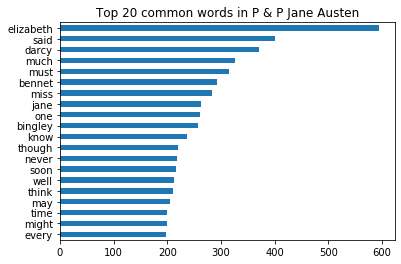

In [16]:
# Use pandas to produce bar plot easily
(pd.Series(word_counts).sort_values().tail(20).plot(kind = 'barh', title = 'Top 20 common words in P & P Jane Austen'))

# Exploring P&P using Spacy

`spacy` is a python package for doing text mining using machine learning. It has a lot of awesome functionality, and is documented at https://spacy.io

In [17]:
import spacy

In [18]:
# Install the small model if it doesn't exist already:
! python3 -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## Simple example

We'll start by running through the example on https://spacy.io

In [19]:
# Load the small model
nlp = spacy.load("en_core_web_sm")

`spacy` works by converting raw python strings into special `spacy.tokens.doc.Doc` objects (shown below). Running the raw text through the `nlp` function is the first thing you do when working with spacy. 

Note we don't want to clean the text before using `nlp`, because spacy is aware of punctuation and uses it to parse the grammar (called part-of-speech tagging) of the words in the text.

In [20]:
# Convert strings to nlp objects using the nlp function
doc = nlp("Why don't the cars turn yellow... Said, Mr Brown")

In [21]:
# Shows as text below, but actually this is not a string
doc

Why don't the cars turn yellow... Said, Mr Brown

In [22]:
type(doc)  # this is not a string

spacy.tokens.doc.Doc

`spacy` will split your text into words for free (shown below). This is called `tokenization`.

In [23]:
# Free tokenization
for word in doc:
    print(word)

Why
do
n't
the
cars
turn
yellow
...
Said
,
Mr
Brown


In [24]:
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])

Noun phrases: ['the cars']


In [25]:
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs: ['do', 'turn', 'say']


## Analysing P&P using spacy

Now that we've gone through the basics, we can show how `spacy` works with some real text:

In [26]:
# Convert the raw text to a doc object
austen_text = nlp(text)

In [27]:
# This is a helper function for selecting a slice of a list
from itertools import islice

You can also use `spacy` to split a document into sentences by iterating on the `austen_text.sents` object. `spacy` splits sentences intelligently, just as it does with words.

In [28]:
for i, sent in enumerate(islice(austen_text.sents, 100, 111)):
    # Show sentences 100 to 111
    print("Sentence {}:".format(i))
    print(sent)
    print("\n----------\n")

Sentence 0:
She was a woman of mean understanding,
little information, and uncertain temper.

----------

Sentence 1:
When she was discontented,
she fancied herself nervous.

----------

Sentence 2:
The business of her life was to get her
daughters married; its solace was visiting and news.





----------

Sentence 3:
Chapter 2


Mr. Bennet was among the earliest of those who waited on Mr. Bingley.

----------

Sentence 4:
He
had always intended to visit him, though to the last always assuring
his wife that he should not go; and till the evening after the visit was
paid she had no knowledge of it.

----------

Sentence 5:
It was then disclosed in the following
manner.

----------

Sentence 6:
Observing his second daughter employed in trimming a hat, he
suddenly addressed her with:



----------

Sentence 7:
"I hope Mr. Bingley will like it, Lizzy.

----------

Sentence 8:
"



----------

Sentence 9:
"

----------

Sentence 10:
We are not in a way to know

----------



We repeat the code from the previous section to select the most common noun phrases here:

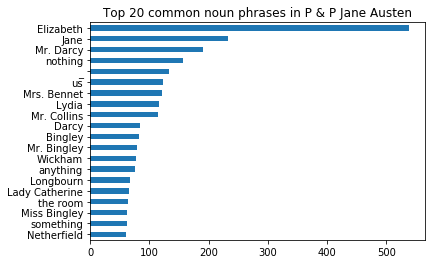

In [29]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', '', text)
    return text

# Get the noun phrases from austen_text
noun_phrases = [chunk.text for chunk in austen_text.noun_chunks \
                    if not clean_text(chunk.text) in stop_words]

# Plot the top 20 results as a bar chart
(pd.Series(noun_phrases)
     .value_counts()
     .sort_values()
     .tail(20)
     .plot(kind = 'barh', 
           title = 'Top 20 common noun phrases in P & P Jane Austen')
)

We can also do the same as above with parts of speech. Below we plot the top 20 most common verbs in the text.

In [30]:
verbs = [token.lemma_ for token in austen_text \
                if token.pos_ == "VERB" and \
                not clean_text(token.text) in stop_words]

# Add the bar chart here yourself:

## Named entity recognition

`spacy` can also identify entities contained in the text (this is called 'named entity recognition'). We plot the top 20 most common people in Pride and Prejudice below:

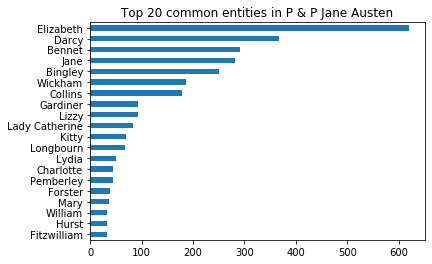

In [31]:
austen_ents = [ent.text for ent in austen_text.ents if ent.label_ == "PERSON"]

(pd.Series(austen_ents)
     .value_counts()
     .sort_values()
     .tail(20)
     .plot(kind = 'barh', 
           title = 'Top 20 common entities in P & P Jane Austen')
)

In [32]:
# The list of the top 20 people mentioned in Pride and Prejudice
entities = list(pd.Series(austen_ents)
     .value_counts()
     .sort_values(ascending = False)
     .head(20)
     .index
)

# Pretty print the list below
print(", ".join(entities))

Elizabeth, Darcy, Bennet, Jane, Bingley, Wickham, Collins, Gardiner, Lizzy, Lady Catherine, Kitty, Longbourn, Lydia, Charlotte, Pemberley, Forster, Mary, William, Hurst, Fitzwilliam


## Extracting the common co-occuring characters in Pride and Prejudice

The goal of this section is to discover and visualise the number of times each of the top 20 characters are mentioned together in a sentence in the original text. 

We will do this by assembling a `numpy` array into a table of results containing the counts of the number of times each pair of characters co-occurs in the any sentence of the original text.

In [33]:
import numpy as np

In [34]:
# We use numpy arrays to store rectangular numeric data
np.array([[1,2,3], [4,5,6], [7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### A simple example

As always, we begin with a simple example. Given just one sentence, we want to extract the list of all pairs of characters who have occurred in the sentence. We work towards achieving this below, then generalise the code into something we can repeat over the whole dataset.

In [35]:
# This is our sentence:
ent_text = '''Mr. Darcy stood near Charlotte in silent indignation at such a mode of
passing the evening, to the exclusion of Hurst, and was too
much engrossed by his thoughts to perceive that Sir William Lucas was
his neighbour, till Sir William thus began:

"What a charming amusement for young people this is, Mr. Darcy!'''

print(ent_text)

Mr. Darcy stood near Charlotte in silent indignation at such a mode of
passing the evening, to the exclusion of Hurst, and was too
much engrossed by his thoughts to perceive that Sir William Lucas was
his neighbour, till Sir William thus began:

"What a charming amusement for young people this is, Mr. Darcy!


First, we want to find the entities from our top 20 list who occur in `ent_text`.

In [36]:
matched_entities = [ent for ent in entities if ent in ent_text]
print("We found the entities: {}".format(", ".join(matched_entities)))

We found the entities: Darcy, Charlotte, William, Hurst


Next, now that we know which entities are in the sentence, we need to generate the possible pairs of characters from this list so we can count them all correctly. To do this we use the helper function `product` from the `itertools` package.

In [37]:
# This is a helper function for generating all possible pairs from a given list
from itertools import product

# This is a simple example of how it works:
list(product('abc', repeat = 2))

[('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'a'),
 ('b', 'b'),
 ('b', 'c'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'c')]

Next we create a generator to give us all of the pairs of characters in a given sentence. This function is called a generator because it uses the `yield` keyword, which means that it returns an 'iterable', which can be iterated on using a for loop just like a list.

In [38]:
def count_entity_pairs(text, entities):
    matched_entities = [ent for ent in entities if ent in text]
    for ent1, ent2 in product(matched_entities, repeat = 2):
        yield ent1, ent2

Below is an example of the output from the `count_entity_pairs` function. Generators do not return a value on their own, so you have to wrap it in `list()` in order to see the values first.

In [39]:
# Can't see me
count_entity_pairs("Darcy and Elizabeth met Bingley", entities)

<generator object count_entity_pairs at 0x7fe409ae3150>

In [40]:
# Can see me
list(count_entity_pairs("Darcy and Elizabeth met Bingley", entities))

[('Elizabeth', 'Elizabeth'),
 ('Elizabeth', 'Darcy'),
 ('Elizabeth', 'Bingley'),
 ('Darcy', 'Elizabeth'),
 ('Darcy', 'Darcy'),
 ('Darcy', 'Bingley'),
 ('Bingley', 'Elizabeth'),
 ('Bingley', 'Darcy'),
 ('Bingley', 'Bingley')]

One more thing we need to do is index the names of the characters, so we know how to address them in the numpy array. We do this below:

In [41]:
entity_dict = {ent: i for i, ent in enumerate(entities)}
entity_dict

{'Elizabeth': 0,
 'Darcy': 1,
 'Bennet': 2,
 'Jane': 3,
 'Bingley': 4,
 'Wickham': 5,
 'Collins': 6,
 'Gardiner': 7,
 'Lizzy': 8,
 'Lady Catherine': 9,
 'Kitty': 10,
 'Longbourn': 11,
 'Lydia': 12,
 'Charlotte': 13,
 'Pemberley': 14,
 'Forster': 15,
 'Mary': 16,
 'William': 17,
 'Hurst': 18,
 'Fitzwilliam': 19}

Now we are ready to create the numpy array we are going to use to store the data. We initialise the array with all zeros, so it's ready for us to start counting.

`numpy` arrays have a `shape`, which in this case is the number of rows and columns in the array. For this work we want the number of rows and columns to equal the number of entities we're matching.

In [42]:
# This is where we're gonna store the data
ent_array = np.zeros((len(entities), len(entities)))
print("ent_array.shape:", ent_array.shape)

ent_array.shape: (20, 20)


Now we are ready to do the counting.

For each sentence in `austen_text`:
- If any of the entities are mentioned in that sentence
- We extract all of the entities in the sentence and arrange them into pairs (`ent1`, `ent2`)
- Then we increase the corresponding array entry for that pair by one

In [43]:
for sent in austen_text.sents:
    if any(ent in sent.text for ent in entities):
        # At least one of the top 20 entities are in the sentence
        for ent1, ent2 in count_entity_pairs(sent.text, entities):
            # Increment ent_array at the entry corresponding to the pair (ent1, ent2)
            ent_array[entity_dict[ent1], entity_dict[ent2]] += 1

Now that we have set up the data array we wanted, we can visualise it below using `matplotlib`.

In [44]:
import matplotlib.pyplot as plt

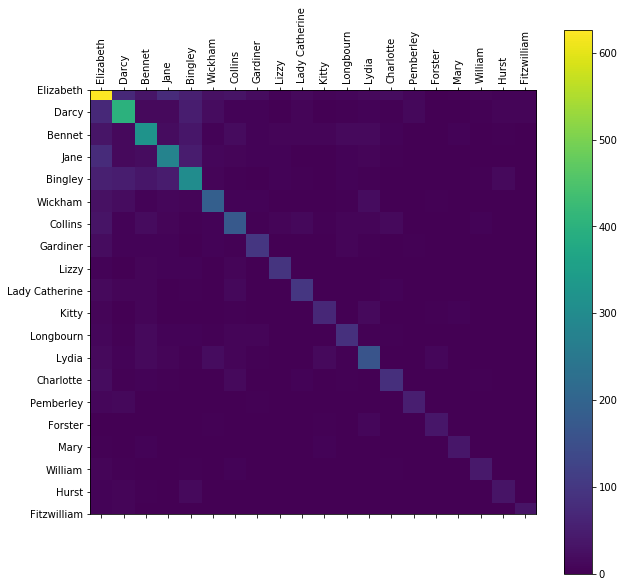

In [45]:
# Understanding matplotlib code not compulsory :P

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(ent_array, interpolation='nearest')
fig.colorbar(cax)

plt.xticks(np.arange(len(entities)), entities, rotation='vertical')
ax.set_yticks(np.arange(len(entities)))
ax.set_yticklabels(entities)

print()

One more thing you can do is rescale the array before you plot it, so the darker colours show more easily. We do this below:

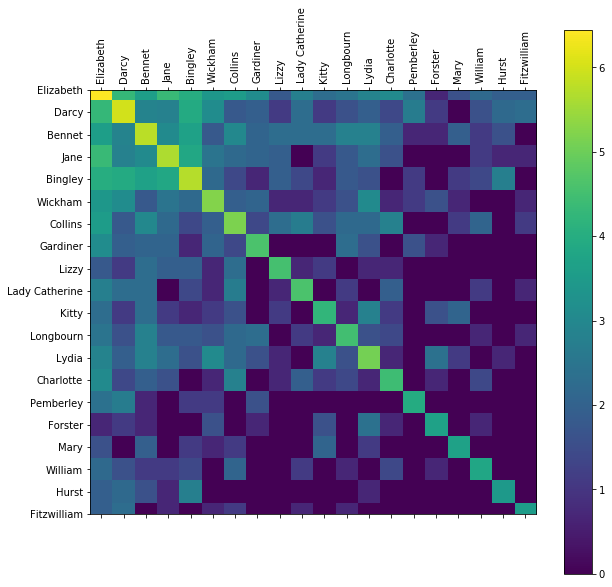

In [46]:
scaled_array = np.log(ent_array + 1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(scaled_array, interpolation='nearest')
fig.colorbar(cax)

plt.xticks(np.arange(len(entities)), entities, rotation='vertical')
ax.set_yticks(np.arange(len(entities)))
ax.set_yticklabels(entities)

print()

Unfortunately, you can see there isn't much signal in the smaller values. The plot is mostly random now, so probably the non-scaled version is better because while you can see less, at least you can (barely) see the stuff that matters.